# Project

## Download Data

In [1]:
import urllib
import json
import pandas as pd
from bd_addons.interpro_data import *
from bd_addons.HmmPy import *
from bd_addons.metrics import *
from Bio import SearchIO, SeqIO

url = "https://www.ebi.ac.uk/interpro/api/protein/reviewed/entry/pfam/pf03060?format=json"

In [2]:
metadata, entries, gt = get_data(url, 1)


# 8 - Evaluate Ability of Matching sequences
Once we made the PSI-BLAST e HMM-searches we will have some files where all the sequences are... we should:

- Find a format that we can parse (there should be options in the documentations of thevarious methods);
- Decide a threshold for the E-value and take all the hits that are below that E value;
- All the remaining sequences (call them OUT_SEQs)are the ones that, according to our model, belong to the Domain family.
- Make a Confusion Matrix comparing OUT_SEQs with the ground truth.
- compute accuracy, sensitivity, specificty etc

## HMM Searches Performance

In [3]:
metrics_df, parsed_tblouts, parsed_domtblouts, parsed_psiblast = metrics_8(gt)
metrics_df

,accuracy,precision,recall,specificity,balanced_accuracy,mcc,f1_score
hmmsearch_out_C_1_denoised1_swissprot.domtblout,0.996202,0.010624,1.000000,0.996202,0.998101,0.102875,0.021024
hmmsearch_out_C_1_swissprot.domtblout,0.996230,0.010703,1.000000,0.996230,0.998115,0.103258,0.021179
hmmsearch_out_C_3_denoised1_uniref90.domtblout,0.995502,0.008984,1.000000,0.995501,0.997751,0.094572,0.017809
hmmsearch_out_C_3_uniref90.domtblout,0.995521,0.009023,1.000000,0.995521,0.997760,0.094777,0.017885
hmmsearch_out_C_4_denoised1_uniref90.domtblout,0.995757,0.009520,1.000000,0.995757,0.997878,0.097363,0.018860
hmmsearch_out_C_4_uniref90.domtblout,0.995776,0.009563,1.000000,0.995776,0.997888,0.097586,0.018946
hmmsearch_out_M_1.domtblout,0.996236,0.010718,1.000000,0.996235,0.998118,0.103331,0.021208
hmmsearch_out_M_4_denoised1_uniref90.domtblout,0.995730,0.009461,1.000000,0.995730,0.997865,0.097060,0.018745
hmmsearch_out_M_4_uniref90.domtblout,0.995743,0.009488,1.000000,0.995743,0.997871,0.097201,0.018799
hmmsearch_out_O_1.domtblout,0.996230,0.010703,1.000000,0.996230,0.998115,0.103258,0.021179


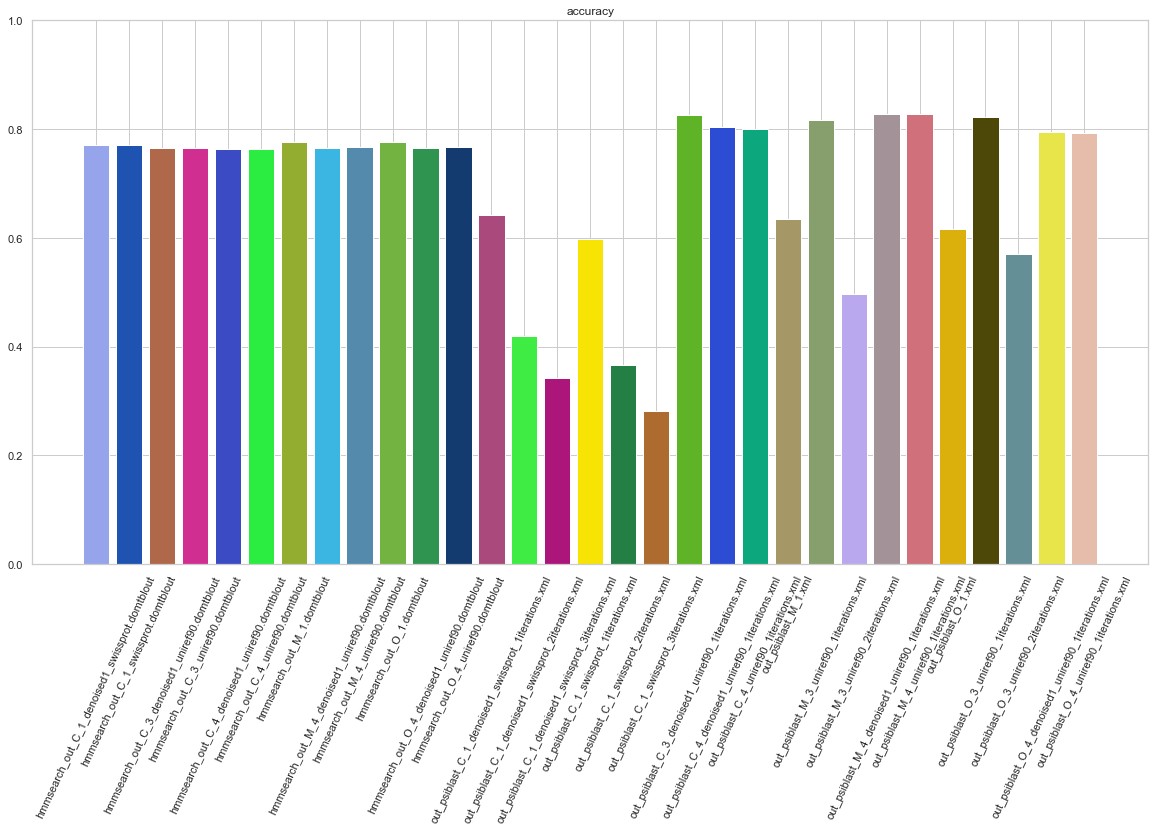

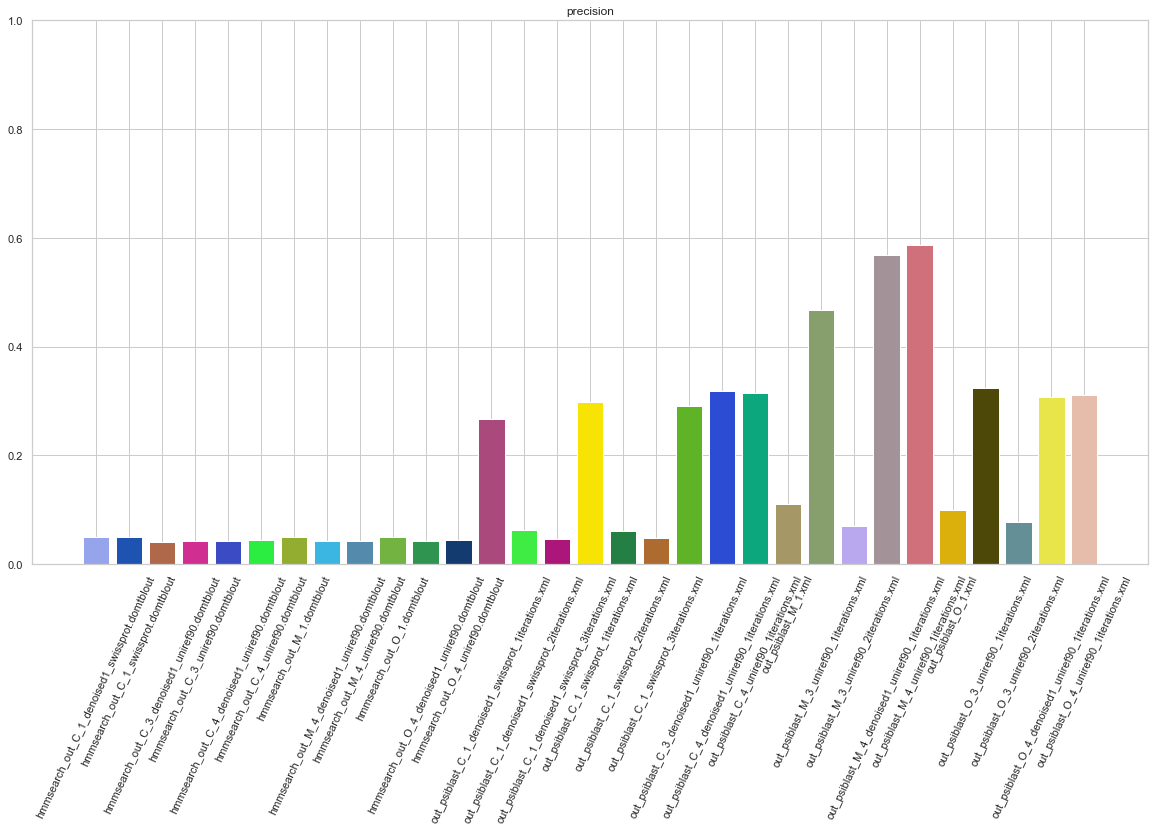

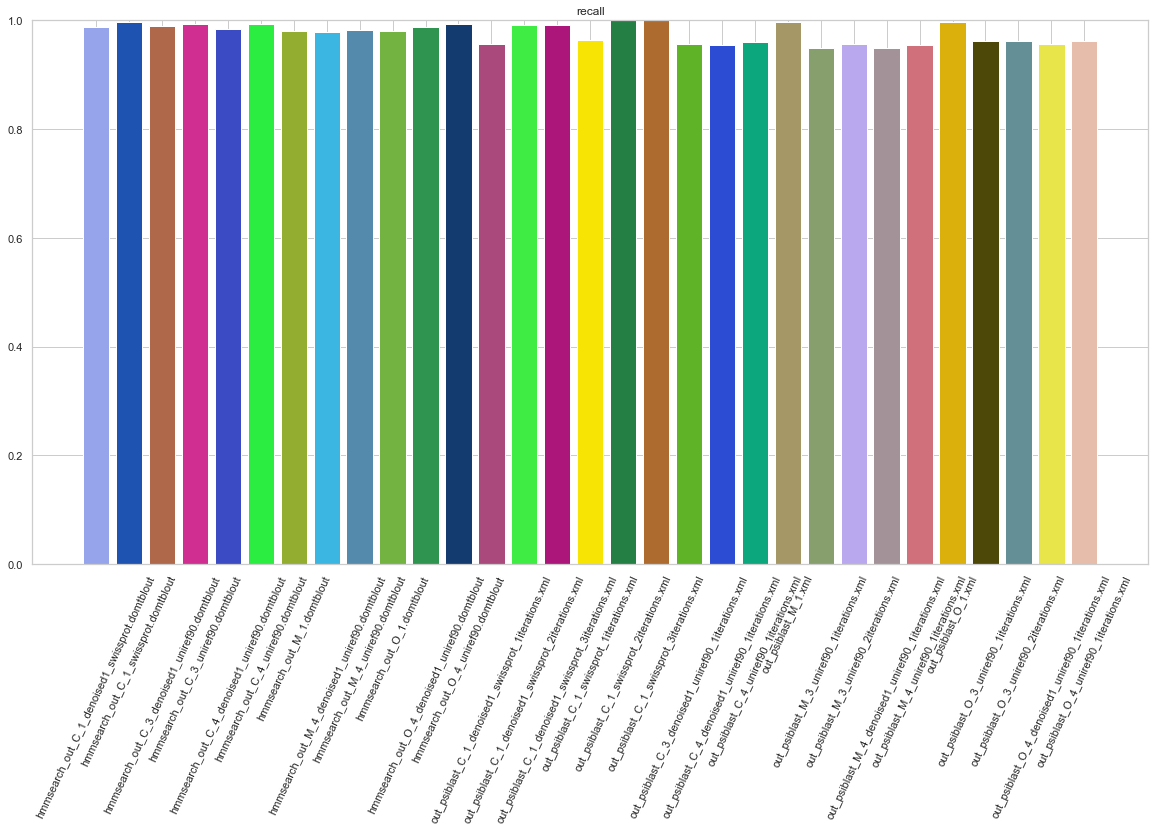

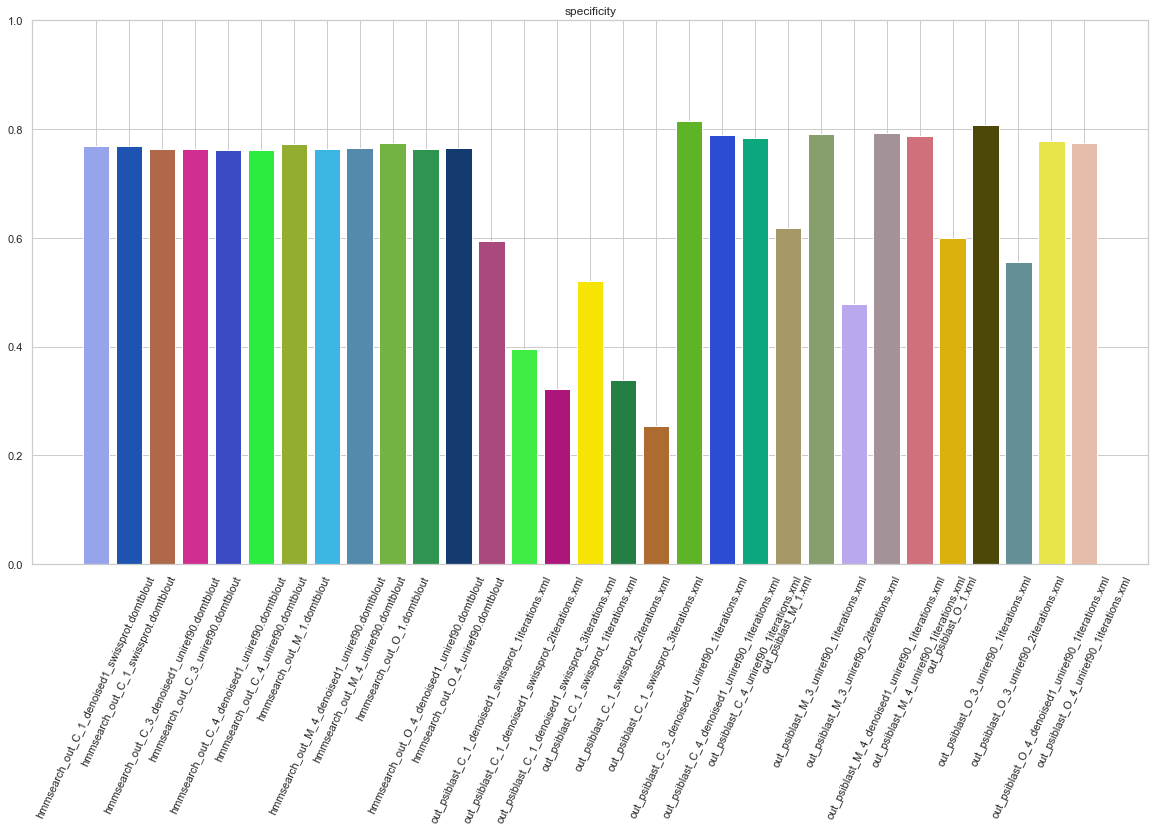

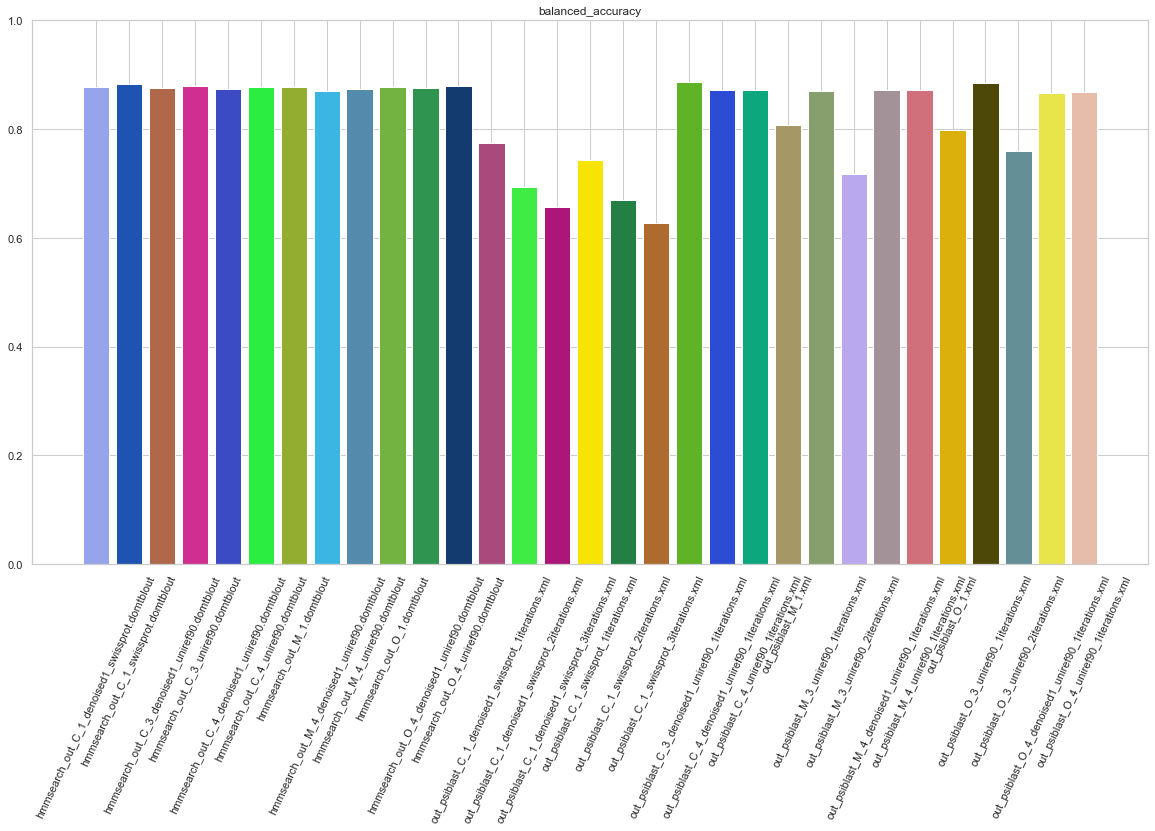

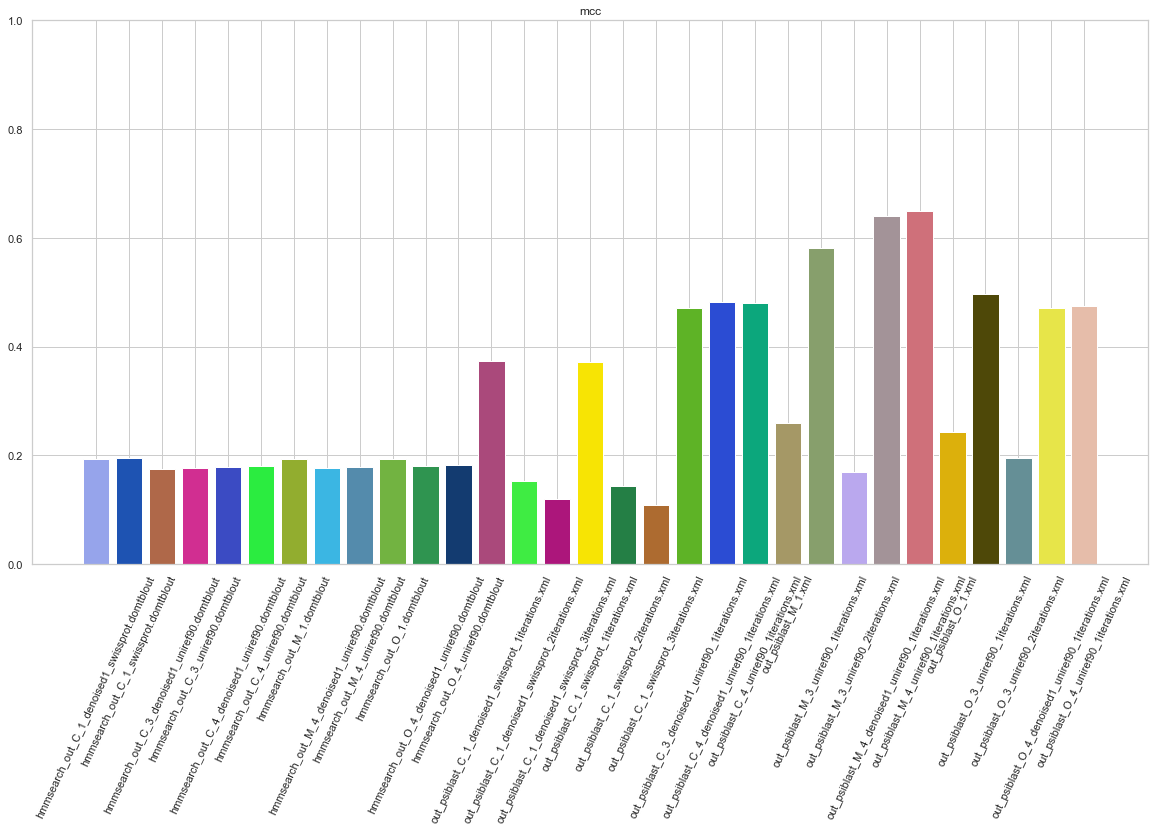

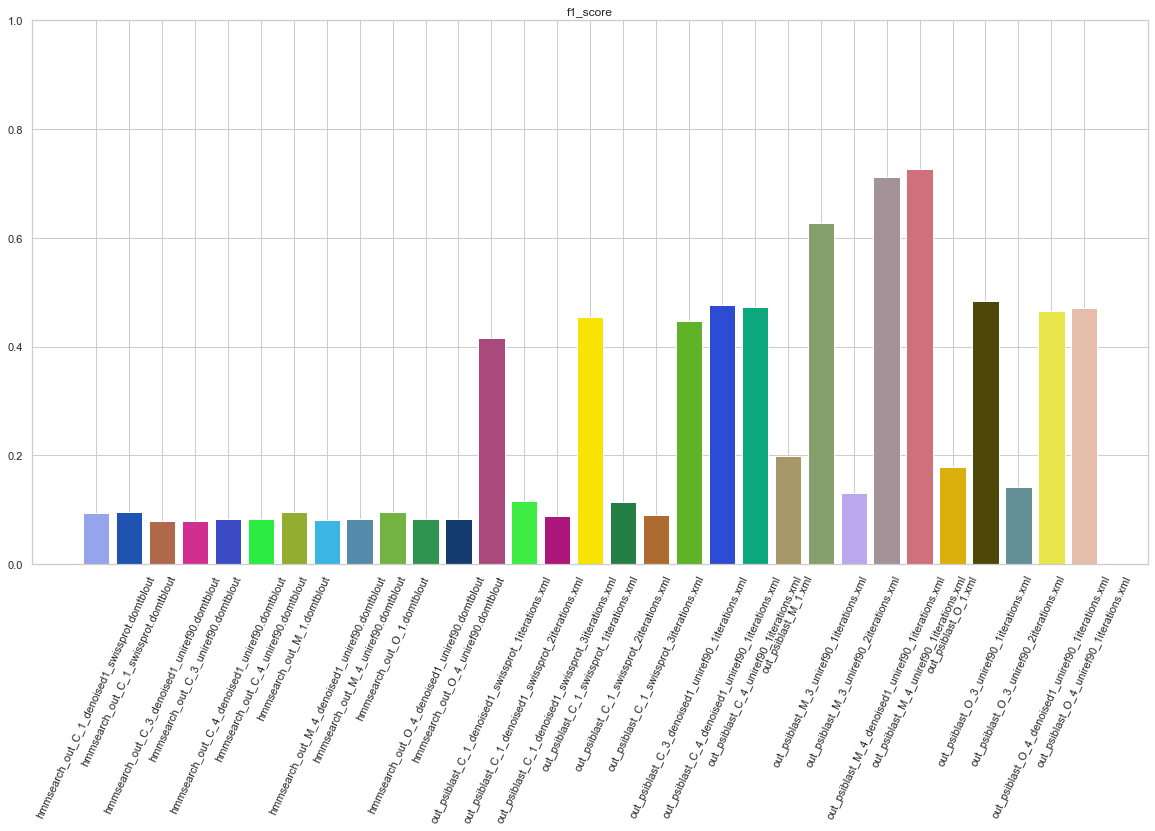

In [6]:
plot_metrics_8(metrics_df)

# 9 - Evaluate the ability of matching domain positions
Here we want to evaluate how good our model is at estimating domain positions inside the found proteins.

In [4]:
metrics_df, conf_df = metrics_9(parsed_domtblouts, parsed_psiblast, gt)
metrics_df

,accuracy,precision,recall,specificity,balanced_accuracy,mcc,f1_score
hmmsearch_out_C_1_denoised1_swissprot.domtblout,0.771177,0.049190,0.987158,0.768558,0.877858,0.192407,0.093710
hmmsearch_out_C_1_swissprot.domtblout,0.771426,0.049998,0.997641,0.768665,0.883153,0.195665,0.095223
hmmsearch_out_C_3_denoised1_uniref90.domtblout,0.765331,0.041141,0.989385,0.763029,0.876207,0.175635,0.078997
hmmsearch_out_C_3_uniref90.domtblout,0.766020,0.041666,0.993710,0.763666,0.878688,0.177461,0.079979
hmmsearch_out_C_4_denoised1_uniref90.domtblout,0.764046,0.042909,0.984537,0.761653,0.873095,0.178477,0.082234
hmmsearch_out_C_4_uniref90.domtblout,0.764280,0.043499,0.993055,0.761784,0.877419,0.180996,0.083347
hmmsearch_out_M_1.domtblout,0.775920,0.050151,0.980868,0.773421,0.877144,0.193909,0.095423
hmmsearch_out_M_4_denoised1_uniref90.domtblout,0.765210,0.042500,0.977985,0.762920,0.870452,0.176801,0.081460
hmmsearch_out_M_4_uniref90.domtblout,0.767167,0.043085,0.982178,0.764850,0.873514,0.178880,0.082549
hmmsearch_out_O_1.domtblout,0.776423,0.050043,0.980605,0.773944,0.877275,0.193728,0.095227


In [5]:
conf_df

,true_positives,true_negatives,false_positives,false_negatives
hmmsearch_out_C_1_denoised1_swissprot.domtblout,7533,483525,145608,98
hmmsearch_out_C_1_swissprot.domtblout,7613,480647,144654,18
hmmsearch_out_C_3_denoised1_uniref90.domtblout,7550,566594,175965,81
hmmsearch_out_C_3_uniref90.domtblout,7583,563573,174411,48
hmmsearch_out_C_4_denoised1_uniref90.domtblout,7513,535506,167578,118
hmmsearch_out_C_4_uniref90.domtblout,7578,532875,166634,53
hmmsearch_out_M_1.domtblout,7485,483907,141764,146
hmmsearch_out_M_4_denoised1_uniref90.domtblout,7463,541060,168136,168
hmmsearch_out_M_4_uniref90.domtblout,7495,541437,166463,136
hmmsearch_out_O_1.domtblout,7483,486323,142047,148
